# Making a chart of presidents' ages

## 1. The brief

"Do something that shows Biden's age in context"

**1.1: Find the data**

First problem: Birth dates and inauguration dates of US presidents are easy to find, but there are not many datasets with all of this information in the same place.

One of the most comprehensive: [httdata://people.math.sc.edu/Burkardt/datasets/presidents/presidents.html](httdata://people.math.sc.edu/Burkardt/datasets/presidents/presidents.html)

**1.2: Download and verify the data**

We initially download the `president_timelines.csv` file; then manually correct some entries and save it as `president_timelines_corrected.csv`

Then load the data:

In [1]:
# Load data
data <- read.csv('data/president_timelines_corrected.csv')

## 2. Processing the data

Taking inspiration from an already existing chart:

![chart](https://blogs.sas.com/content/iml/files/2016/11/PresAge2.png)

* To process the data, we need to get an age in years from the date of birth and term dates.
* This project, as a whole, is a good use case for R. (Why?)

In [2]:
# Load a date handling library
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
head(data)

,Index,Name,Birth,Death,TermBegin,TermEnd
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,George Washington,22 February 1732,14 December 1799,30 April 1789,4 March 1797
2,2,John Adams,30 October 1735,4 July 1826,4 March 1797,4 March 1801
3,3,Thomas Jefferson,13 April 1743,4 July 1826,4 March 1801,4 March 1809
4,4,James Madison,16 March 1751,28 June 1836,4 March 1809,4 March 1817
5,5,James Monroe,28 April 1758,4 July 1831,4 March 1817,4 March 1825
6,6,John Quincy Adams,11 July 1767,23 February 1848,4 March 1825,4 March 1829


In [4]:
# Convert date strings to datetime object
data$Birth <- as.Date(data$Birth, format = "%d %b %Y")
data$Death <- as.Date(data$Death, format = "%d %b %Y")
data$TermBegin <- as.Date(data$TermBegin, format = "%d %b %Y")
data$TermEnd <- as.Date(data$TermEnd, format = "%d %b %Y")

In [5]:
head(data)

,Index,Name,Birth,Death,TermBegin,TermEnd
,<int>,<chr>,<date>,<date>,<date>,<date>
1,1,George Washington,1732-02-22,1799-12-14,1789-04-30,1797-03-04
2,2,John Adams,1735-10-30,1826-07-04,1797-03-04,1801-03-04
3,3,Thomas Jefferson,1743-04-13,1826-07-04,1801-03-04,1809-03-04
4,4,James Madison,1751-03-16,1836-06-28,1809-03-04,1817-03-04
5,5,James Monroe,1758-04-28,1831-07-04,1817-03-04,1825-03-04
6,6,John Quincy Adams,1767-07-11,1848-02-23,1825-03-04,1829-03-04


Reference: How to [calculate age in R](httdata://datacornering.com/how-to-calculate-age-in-r/) using *time interval*, *year()* 

The trunc() function returns the largest integer that is smaller than or equal to x (i.e : rounds downs the nearest whole number). I used it to get a human-readable age, because we say someone who is 35.8769 years old is still 35. But as Nalini and Paz pointed out, it's not needed for plotting data and actually makes the chart a little less accurate.

In [6]:
# Example without trunc(): calculating presidents' ages from time intervals
(data\$Birth %--% data\$TermBegin) / years(1)

[1] 57.18356 61.34247 57.89041 57.96712 58.84932 57.64658 61.96986 54.24384
 [9] 68.06301 51.01644 49.33425 64.27397 50.50137 48.27671 65.86301 52.05479
[17] 56.29315 46.85205 54.41370 49.28767 51.95616 47.96164 55.53699 55.96164
[25] 54.09315 42.88219 51.46575 56.18082 55.33425 51.07923 54.56438 51.09041
[33] 60.92877 62.26849 43.64658 55.23770 56.03014 61.07123 52.30411 69.95355
[41] 64.60822 46.42192 54.54247 47.46301 70.60274 78.16712 82.16712 78.60274

In [7]:
# Create new columns for age at inaguration and term end

data$InaugurationAge <- trunc((data$Birth %--% data$TermBegin) / years(1))
data$EndTermAge <- trunc((data$Birth %--% data$TermEnd) / years(1))

In [8]:
head(data)

,Index,Name,Birth,Death,TermBegin,TermEnd,InaugurationAge,EndTermAge
,<int>,<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>
1,1,George Washington,1732-02-22,1799-12-14,1789-04-30,1797-03-04,57,65
2,2,John Adams,1735-10-30,1826-07-04,1797-03-04,1801-03-04,61,65
3,3,Thomas Jefferson,1743-04-13,1826-07-04,1801-03-04,1809-03-04,57,65
4,4,James Madison,1751-03-16,1836-06-28,1809-03-04,1817-03-04,57,65
5,5,James Monroe,1758-04-28,1831-07-04,1817-03-04,1825-03-04,58,66
6,6,John Quincy Adams,1767-07-11,1848-02-23,1825-03-04,1829-03-04,57,61


## 3. Plotting the data

To plot the data, we'll use the `ggplot` library. It's very versatile and has extensive documentation.

In [9]:
# Load ggplot
library(ggplot2)

In [10]:
# Set graph dimensions
options(repr.plot.width=12, repr.plot.height=8)

A note on GGplot usage:

Charts are made sequentially, starting with the `ggplot()` function, and adding layers of data and aesthetics.

Aesthetics cascade down across layers: each layer inherits from the previous layer, but can also *add or override* aesthetics.


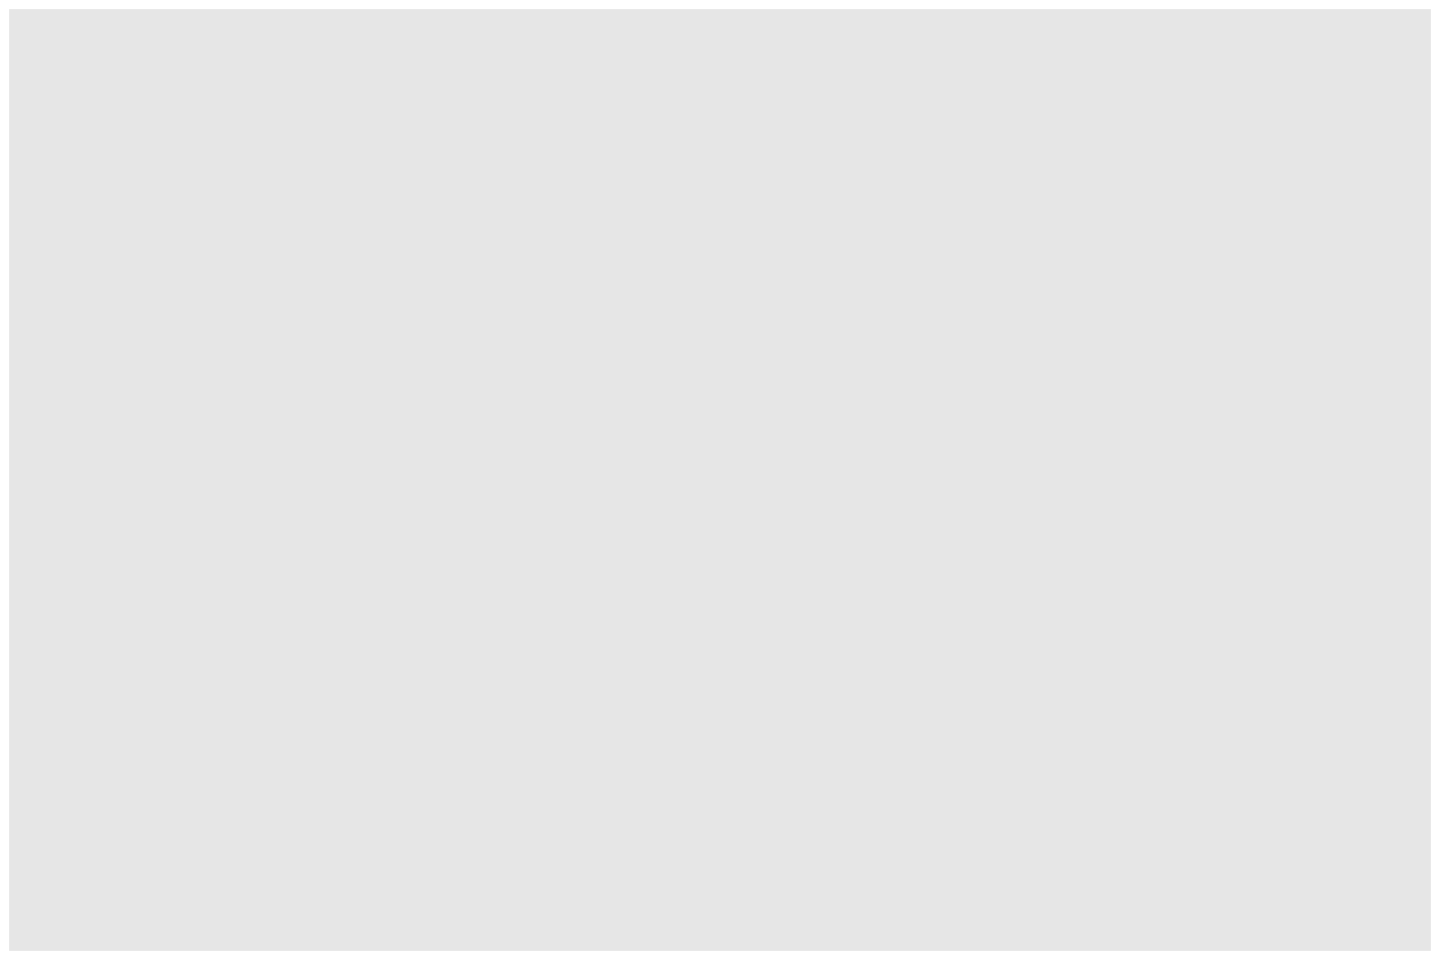

In [11]:
# Make a ggplot object
ggplot(data)

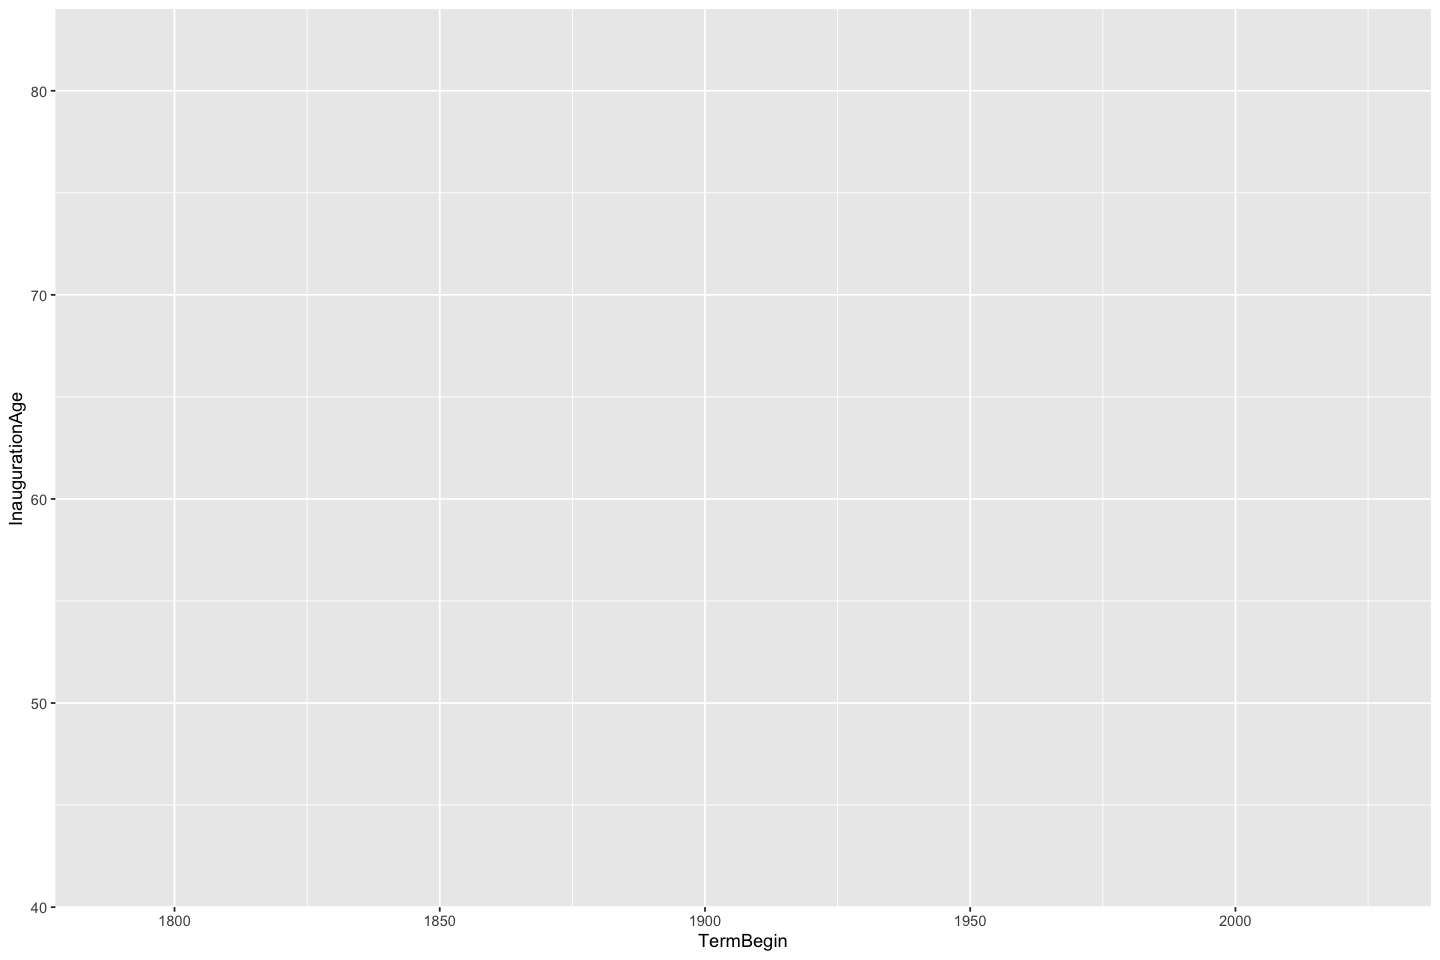

In [12]:
# Make a ggplot object with x-y axis
ggplot(data, aes(x = TermBegin, 
               y = InaugurationAge))

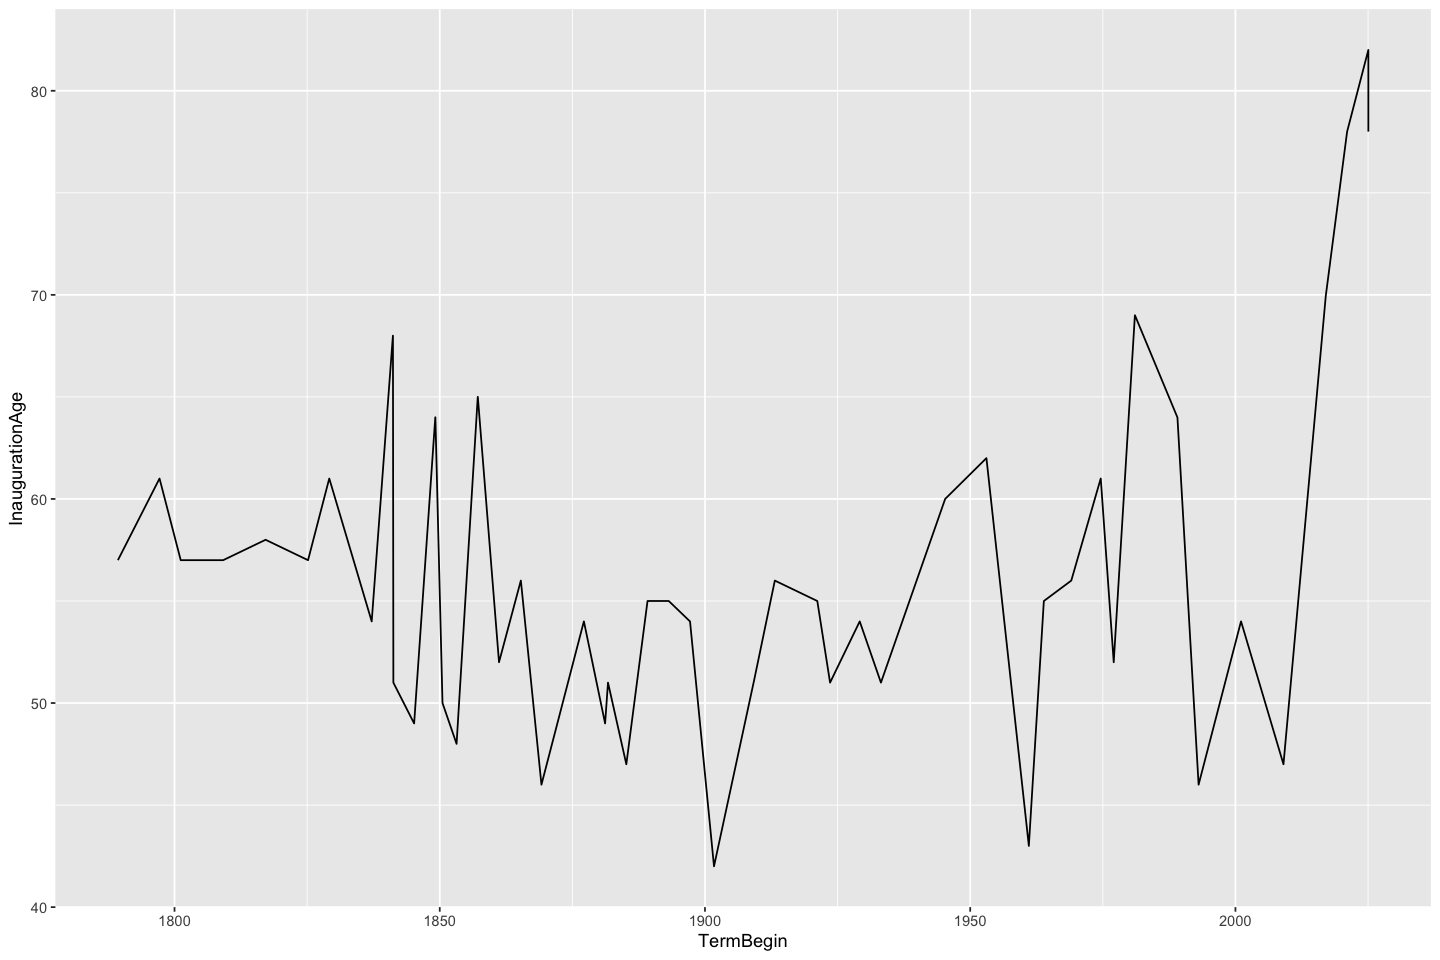

In [13]:
# Add a line with geom_line()

ggplot(data, aes(x = TermBegin, y = InaugurationAge)) + 
geom_line()

**Challenge**: Usually when we create a line chart we draw a single line that connects consecutive values in a column. (The Adobe Illustrator data/chart format).

In this case, we want many separate lines that connect points in the same row but across multiple columns.

Solution: Use geom_segment()

Let's [take a look at the documentation](httdata://ggplot2.tidyverse.org/reference/geom_segment.html).

So: first x position is beginning of term, second x position is end.

First y position is starting age, second y position is ending age.

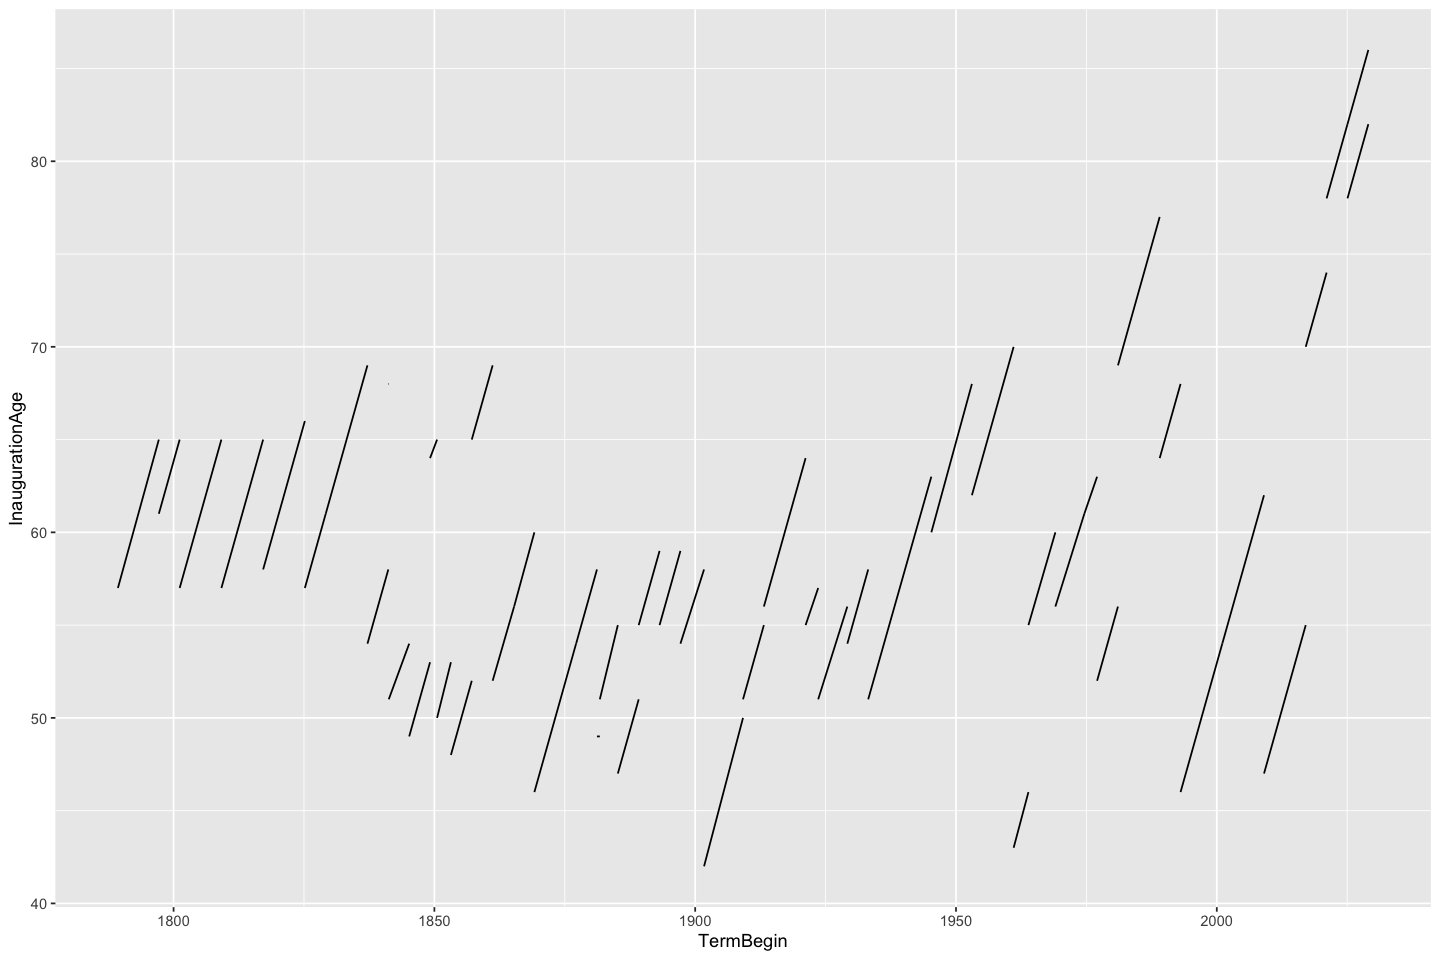

In [14]:
# Add segmented lines
ggplot(data, aes(x = TermBegin, y = InaugurationAge)) + 
    geom_segment(aes(xend = TermEnd, yend = EndTermAge))

## (thanks to Julia for suggestion on clearer syntax here)

This is looking good! To more closely resemble our source image, we should add points and arrows.

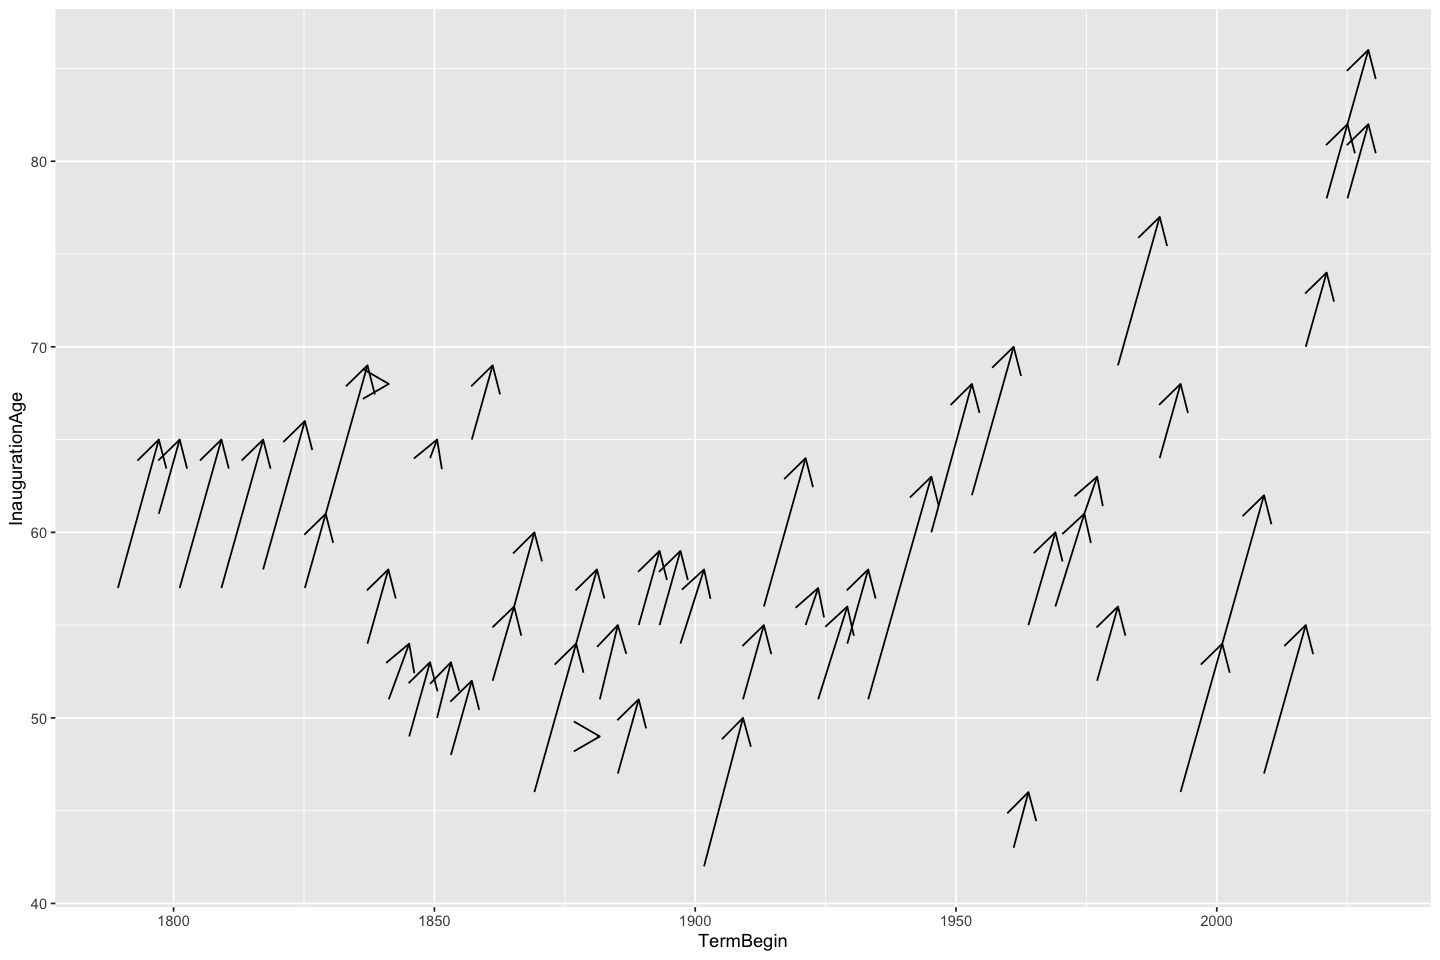

In [15]:
# Add arrows to show direction

ggplot(data, aes(x = TermBegin, y = InaugurationAge)) + 
    geom_segment(aes(xend = TermEnd, yend = EndTermAge), 
                arrow = arrow()) # geom_segment function takes an "arrow" argument

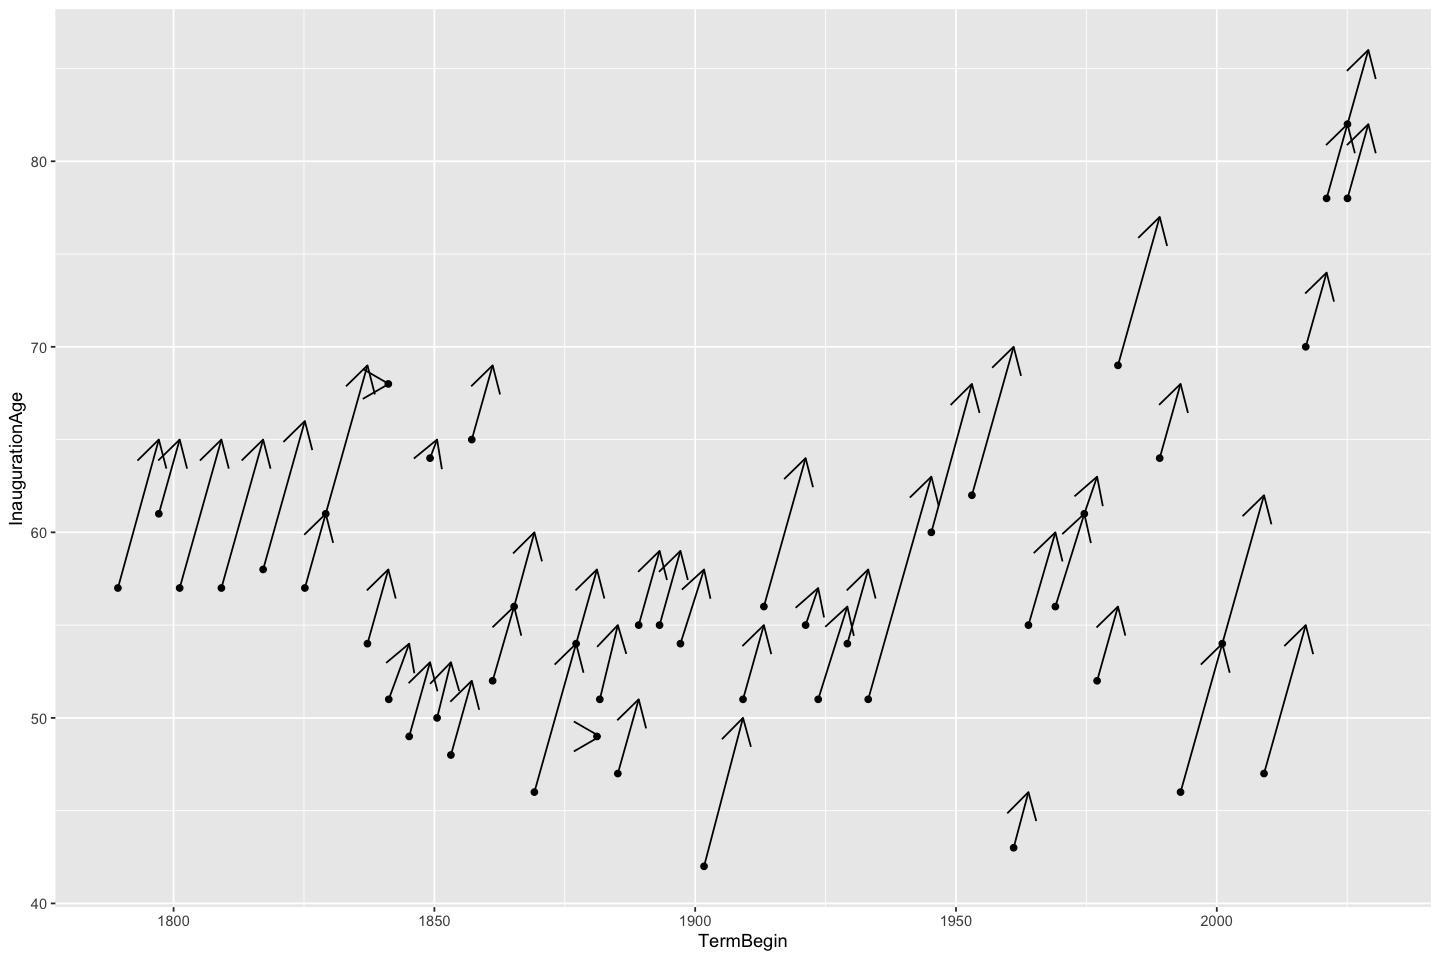

In [17]:
# Add points
ggplot(data, aes(x = TermBegin, y = InaugurationAge)) + 
    geom_segment(aes(xend = TermEnd, yend = EndTermAge), 
                arrow = arrow()) +
    geom_point()

Lastly, we'll need to see the presidents' names (even if most of them will be deleted.)

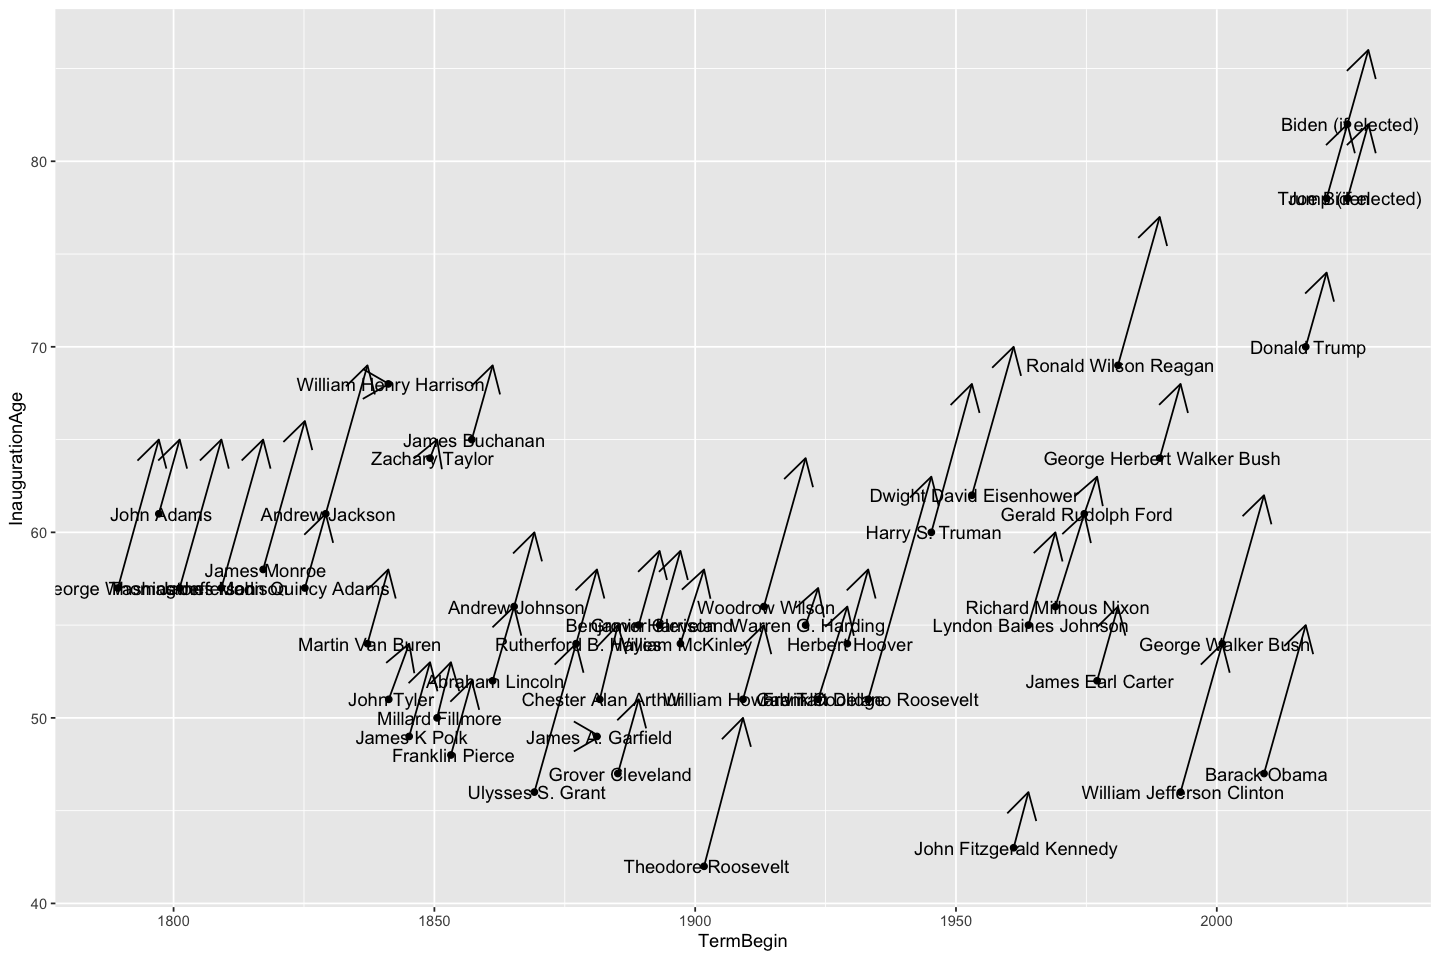

In [18]:
# Add name labels
ggplot(data, aes(x = TermBegin, y = InaugurationAge)) + 
    geom_segment(aes(xend = TermEnd, yend = EndTermAge), 
                arrow = arrow()) +
    geom_point() +
    geom_text(aes(label = Name))

And that's pretty much it for the base chart! We can now export as an SVG to style in Illustrator.

In [19]:
# Save as SVG
ggsave(file="demo-president-chart.svg", width=12, height=8)